In [3]:
import pyscreenshot as ss
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
from keras import layers
from time import sleep

In [33]:
r = 20
r*5,r*4

(100, 80)

In [34]:
labels = np.array(['no','smile'])
inputsize = (r*5,r*4)
inputsize,labels

((100, 80), array(['no', 'smile'], dtype='<U5'))

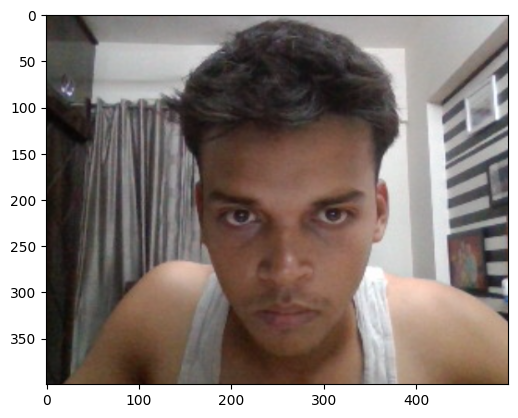

In [35]:
im = ss.grab(bbox=(60,180,560,580))
im = np.array(im)
label = np.array([0])
plt.imshow(im)

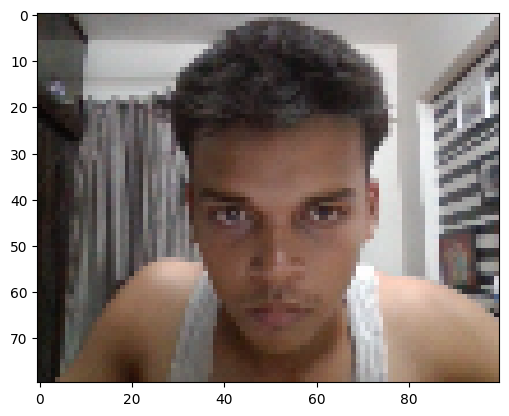

In [36]:
im = cv2.resize(im,inputsize)
x=np.array([im])
y = np.array(label)

plt.imshow(x[0])

In [37]:
# x = np.append(x,np.array([im]),axis=0)
# y = np.append(y,label)
labels,x.shape

(array(['no', 'smile'], dtype='<U5'), (1, 80, 100, 3))

In [40]:
tot = 10
lbl = 1
slp = 0

if lbl == 0:
    tot -= 1
for i in range(tot):
    sleep(slp)
    im = ss.grab(bbox=(60,180,560,580))
    im = np.array(im)
    label = np.array([lbl])
    im = cv2.resize(im,inputsize)
    x = np.append(x,np.array([im]),axis=0)
    y = np.append(y,label)
    bar = (30*(i+1))//tot
    es = "=" * bar
    ls = "-" * (30-bar)
    print(f"\r[{es}>{ls}] ,done: {i+1}/{tot}             ",end=" ")
print("\ndone")

[==============================>] ,done: 10/10              
done


In [41]:
x.shape,y.shape,y,np.unique(y,return_counts=True)

((20, 80, 100, 3),
 (20,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 (array([0, 1]), array([10, 10], dtype=int64)))

In [42]:
expx = x
expy = y

In [43]:
def shakeimg(img):
    width, height = img.shape[:2]
    h1 = np.random.randint(0,int(height*.20))
    h2 = np.random.randint(height-int(height*.20),height)
    w1 = np.random.randint(0,int(width*.20))
    w2 = np.random.randint(width-int(width*.20),width)
    
    fh = np.random.randint(0,2)
    fw = np.random.randint(0,2)
    img = cv2.addWeighted(img,np.random.randint(50,150)/100,np.zeros(x[0].shape,x[0].dtype),0,np.random.randint(-50,51))
    if(fh):
        img = img[::-1,:,:]
    if(fw):
        img = img[:,::-1,:]
    return cv2.resize(img[w1:w2,h1:h2],inputsize)

In [44]:
i = 10

1 smile 10


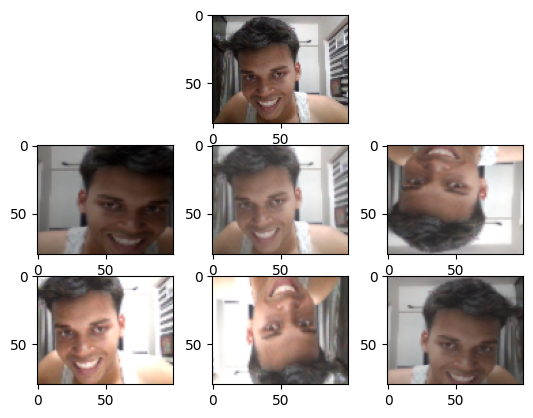

In [45]:
plt.subplot(3,3,2)
plt.imshow(x[i])

plt.subplot(3,3,4)
plt.imshow(shakeimg(x[i]))
plt.subplot(3,3,5)
plt.imshow(shakeimg(x[i]))
plt.subplot(3,3,6)
plt.imshow(shakeimg(x[i]))
plt.subplot(3,3,7)
plt.imshow(shakeimg(x[i]))
plt.subplot(3,3,8)
plt.imshow(shakeimg(x[i]))
plt.subplot(3,3,9)
plt.imshow(shakeimg(x[i]))
print(y[i],labels[y[i]],i)
i +=1

In [46]:
# once

sh = x.shape[0]
for i in range(sh):
    for j in range(10):
        x = np.append(x,np.array([shakeimg(x[i])]),axis=0)
        y = np.append(y,y[i])
    bar = (30*(i+1))//sh
    es = "=" * bar
    ls = "-" * (30-bar)
    print(f"\r[{es}>{ls}] done: {i+1}/{sh} , data:{x.shape[0]}             ",end=" ")
print("done")

[==============================>] done: 20/20 , data:220              done


In [47]:
x.shape,y.shape

((220, 80, 100, 3), (220,))

In [52]:
p = np.random.permutation(y.shape[0])
x = x[p]
y= y[p]

In [53]:
y[:100]

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0])

In [50]:
x = x/255

In [51]:
td = y.shape[0]-y.shape[0]*15//100
xt = x[td:x.shape[0]]
yt = y[td:y.shape[0]]
x = x[0:td]
y = y[0:td]
xt.shape , x.shape

((33, 80, 100, 3), (187, 80, 100, 3))

In [55]:
from keras.api._v2.keras import activations, regularizers
from keras.mixed_precision.loss_scale_optimizer import optimizer
model = keras.Sequential([
    keras.Input(shape=(inputsize[1],inputsize[0],3)),
    layers.BatchNormalization(),
    layers.LeakyReLU(),
    layers.Conv2D(264,(3,3),activation="leaky_relu",kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(264,(3,3),activation="leaky_relu",kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(528,(3,3),activation="leaky_relu",kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(528,(3,3),activation="leaky_relu",kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),
    layers.LeakyReLU(),
    layers.Flatten(),
    layers.Dense(64,activation="leaky_relu",kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(64,activation="leaky_relu",kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(len(labels),keras.activations.softmax),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Batc  (None, 80, 100, 3)       12        
 hNormalization)                                                 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 80, 100, 3)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 78, 98, 264)       7392      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 39, 49, 264)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 37, 47, 264)       627528    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 18, 23, 264)     

In [66]:
model.compile(
    loss = tf.losses.sparse_categorical_crossentropy,
    optimizer = tf.optimizers.Adam(learning_rate=1e-4),
    metrics = ['accuracy']
)

In [77]:
hist = model.fit(x,y,epochs=10,validation_data=(xt,yt),batch_size=4)

Epoch 1/10
187/187 [==============================] - 40s 212ms/step - loss: 1.0427 - accuracy: 0.9733 - val_loss: 1.3091 - val_accuracy: 0.7576
Epoch 2/10
187/187 [==============================] - 44s 236ms/step - loss: 0.9211 - accuracy: 0.9947 - val_loss: 1.2912 - val_accuracy: 0.8182
Epoch 3/10
187/187 [==============================] - 47s 253ms/step - loss: 0.8487 - accuracy: 0.9947 - val_loss: 1.1836 - val_accuracy: 0.7879
Epoch 4/10
187/187 [==============================] - 47s 249ms/step - loss: 0.7966 - accuracy: 1.0000 - val_loss: 1.2120 - val_accuracy: 0.7273
Epoch 5/10
 15/187 [=>............................] - ETA: 36s - loss: 0.7690 - accuracy: 1.0000

KeyboardInterrupt: 

In [ ]:
model.evaluate(xt,yt)

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
hist.history

In [251]:
lr = 1e-3
tr = 10
decay = .8
ep = 2

h = []
for i in range(tr):
    print(f"\r {i})lr={lr}")
    model.compile(
    loss = tf.losses.sparse_categorical_crossentropy,
    optimizer = tf.optimizers.Adam(learning_rate=lr),
    metrics = ['accuracy']
    )
    hist = model.fit(x,y,epochs=ep,validation_data=(xt,yt),batch_size=8)
    h.append([hist.history['loss'],hist.history['val_loss']])
    lr = lr*decay

 0)lr=0.001
Epoch 1/2
31/31 [==============================] - 24s 681ms/step - loss: 11.9766 - accuracy: 0.5246 - val_loss: 12.9951 - val_accuracy: 0.5116
Epoch 2/2
31/31 [==============================] - 21s 685ms/step - loss: 10.8081 - accuracy: 0.5574 - val_loss: 14.6407 - val_accuracy: 0.5349
 1)lr=0.0008
Epoch 1/2
31/31 [==============================] - 27s 808ms/step - loss: 10.1690 - accuracy: 0.5410 - val_loss: 7.2542 - val_accuracy: 0.6047
Epoch 2/2
31/31 [==============================] - 27s 864ms/step - loss: 6.8802 - accuracy: 0.5738 - val_loss: 7.0034 - val_accuracy: 0.4884
 2)lr=0.00064
Epoch 1/2
31/31 [==============================] - 29s 878ms/step - loss: 7.0074 - accuracy: 0.5943 - val_loss: 5.8090 - val_accuracy: 0.5581
Epoch 2/2
31/31 [==============================] - 27s 870ms/step - loss: 5.4497 - accuracy: 0.5656 - val_loss: 5.2116 - val_accuracy: 0.4884
 3)lr=0.0005120000000000001
Epoch 1/2
31/31 [==============================] - 31s 914ms/step - loss: 5.

KeyboardInterrupt: 

In [ ]:
tr = []
va = []

for i in h:
    for j in range(len(i[0])):
        tr.append(i[0][j])
        va.append(i[1][j])
plt.plot(tr)
plt.plot(va)

In [71]:
from sklearn.metrics import confusion_matrix

In [78]:
predictions = model.predict(xt)
predlabels = np.argmax(predictions,axis=1)
cm = confusion_matrix(yt, predlabels)
cm

2/2 [==============================] - 1s 49ms/step


array([[10,  2],
       [ 9, 12]], dtype=int64)

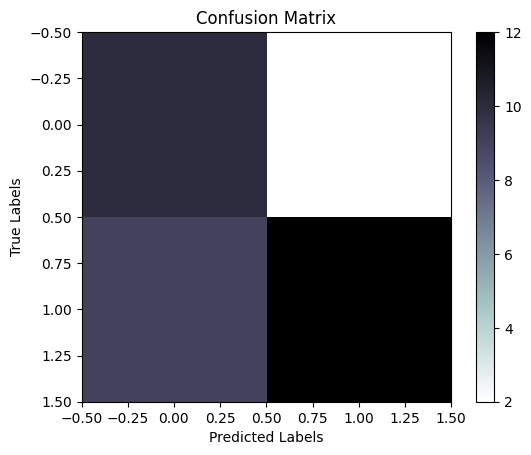

In [79]:
plt.imshow(cm, cmap=plt.cm.bone_r)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


[[0.9825178  0.01748226]], 0, no          

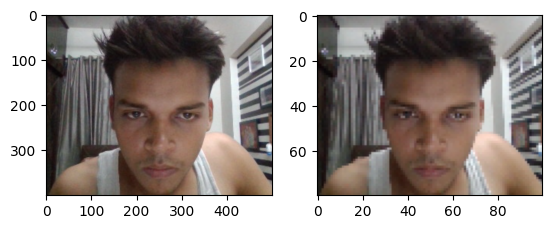

In [75]:
im = ss.grab(bbox=(60,180,560,580))
im = np.array(im)
im = im/255
im2 = cv2.resize(im,inputsize)
ans = model.predict(np.array([im2]),verbose=0)
a = np.argmax(ans[0]) 
plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(im2)
print(f"\r{ans}, {a}, {labels[a]}          ",end="")

In [ ]:
while(1):
    im = ss.grab(bbox=(60,180,560,580))
    im = np.array(im)
    im = im/255
    ans = model.predict(np.array([cv2.resize(im,inputsize)]),verbose=0)
    a = np.argmax(ans[0])
    dots = "O"*labels.size
    dots = dots[:a]+'0'+dots[(a+1):]
    print(f"\r{dots} {np.round(ans*100)},{a}, {labels[a]}                                      ",end="")
    

0O [[100.   0.]],0, no                                         

In [43]:
labels

array(['nothing', 'yash', 'krishna', 'prajwal', 'vaibhav', 'aditya'],
      dtype='<U7')

In [147]:
i = 0

1/1 [==============================] - 0s 86ms/step


(array([[0.36130336, 0.6386967 ]], dtype=float32), 1, 'hand', 0, 'no')

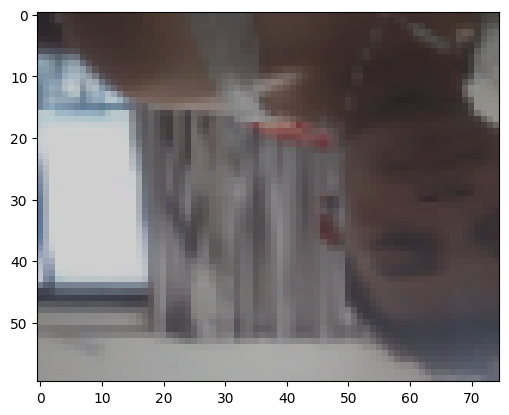

In [150]:
i +=1
ans = model.predict(x[i:i+1])
a = np.argmax(ans[0]) 
plt.imshow(x[i])
ans , a ,labels[a] , y[i],labels[int(y[i])]

1/1 [==============================] - 0s 101ms/step


(array([[0.3432028 , 0.65679723]], dtype=float32), 1, 'hand', 0, 'no')

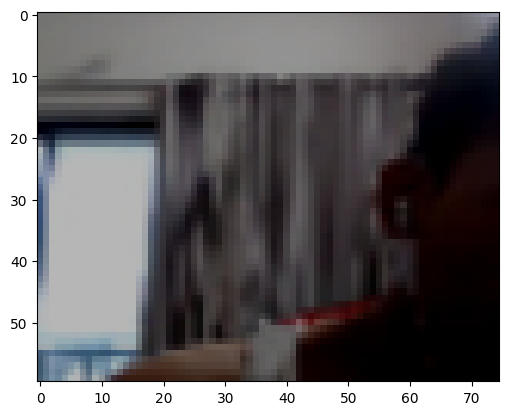

In [155]:
i +=1
ans = model.predict(xt[i:i+1])
a = np.argmax(ans[0]) 
plt.imshow(xt[i])
ans , a ,labels[a] , yt[i],labels[int(yt[i])]

In [125]:
      
    
    
# DATA
    
    


In [126]:
# test back to x
q = np.append(y,yt)
w = np.append(x,xt,axis=0)

In [127]:
x = w
y = q

In [128]:
x = x*255

In [129]:
x.shape

(84, 80, 100, 3)

In [137]:
expx.shape

(94, 80, 100, 3)

In [ ]:
# Reshape the array
f = x.reshape(-1, 600000)

# Create a dictionary to store the column names and values
data = {'label': y}
for i in range(f.shape[1]):
    data[str(i)] = f[:, i]
    

# Create the DataFrame using the dictionary
df = pd.DataFrame(data)

In [59]:
df.dtype

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [53]:
df.to_csv('ok.csv')

In [118]:
model.save("hand.h5")

In [2]:
model = keras.models.load_model("nazi.h5")